# `pandas.plotting` subpackage
Pandas provides some extra plotting functions for a few selection plot types

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices.csv', index_col='Date', parse_dates=True
)

## Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10579E70>,
      dtype=object)

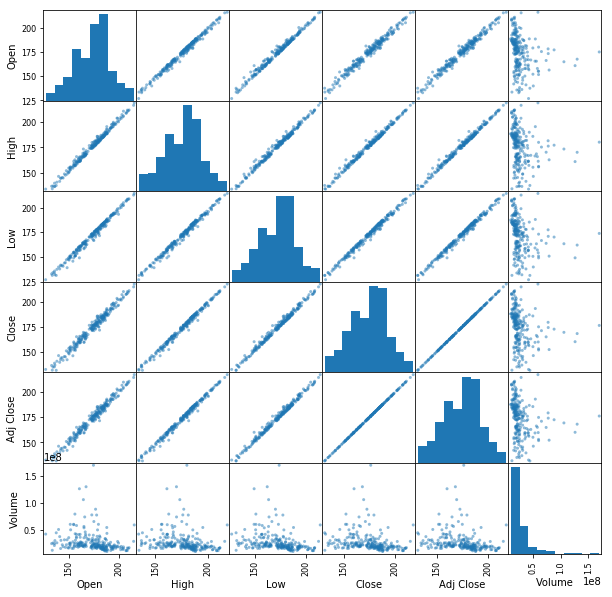

In [2]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10, 10))

Changing the diagonal from histograms to KDE:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10579E50>,
      dtype=object)

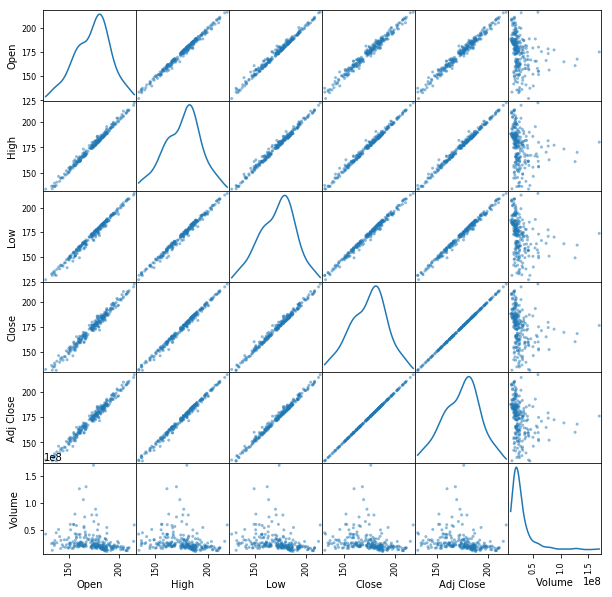

In [3]:
scatter_matrix(fb, figsize=(10, 10), diagonal='kde')

## Lag plot
Lag plots let us see how the variable correlations with past observations of itself. Random data has no pattern:

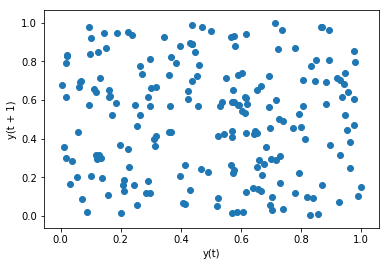

In [4]:
from pandas.plotting import lag_plot
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)))

Data with some level of correlation to itself (autocorrelation) may have patterns. Stock prices are highly auto-correlated:

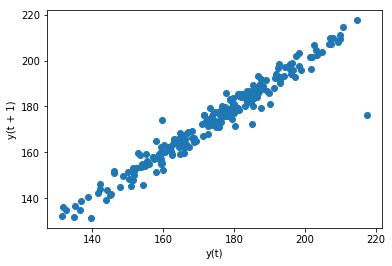

In [5]:
lag_plot(fb.Close)

The default lag is 1, but we can alter this with the `lag` parameter:

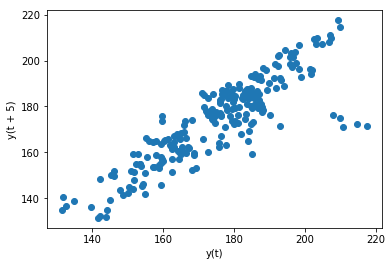

In [6]:
lag_plot(fb.Close, lag=5)

## Autocorrelation plots
We can use the autocorrelation plot to see if this relationship may be meaningful or just noise. Random data will not have any significant autocorrelation (it stays within the bounds below):

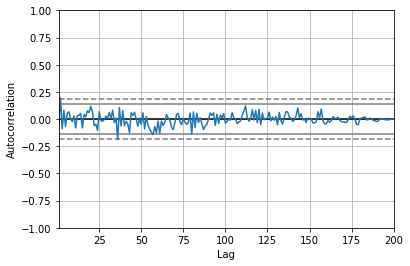

In [7]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0)
autocorrelation_plot(pd.Series(np.random.random(size=200)))

Stock data, on the other hand, does have significant autocorrelation:

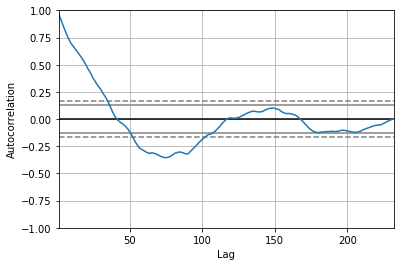

In [8]:
autocorrelation_plot(fb.Close)

## Bootstrap plot
This plot helps us understand the uncertainty in our summary statistics:

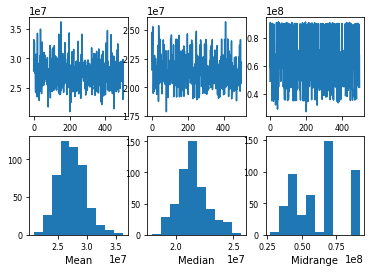

In [9]:
from pandas.plotting import bootstrap_plot
fig = bootstrap_plot(fb.Volume)